In [2]:
import numpy as np
A = np.array([[1, 0, 0, 0, 2],
[0, 0, 3, 0, 0],
[0, 0, 0, 0, 0],
[0, 2, 0, 0, 0]])
U,s,VT=np.linalg.svd(A)
print('U:\n{}'.format(U),'s:{}'.format(s),'VT:{}'.format(VT))

U:
[[ 0.  1.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 0.  0.  0. -1.]
 [ 0.  0.  1.  0.]] s:[3.         2.23606798 2.         0.        ] VT:[[-0.          0.          1.          0.          0.        ]
 [ 0.4472136   0.          0.          0.          0.89442719]
 [-0.          1.          0.          0.          0.        ]
 [ 0.          0.          0.          1.          0.        ]
 [-0.89442719  0.          0.          0.          0.4472136 ]]


In [3]:
a = np.array([[1, 1, 1, 0, 0],
[3, 3, 3, 0, 0],
[4, 4, 4, 0, 0],
[5, 5, 5, 0, 0],
[0, 2, 0, 4, 4],
[0, 0, 0, 5, 5],
[0, 1, 0, 2, 2]])
U,s,VT=np.linalg.svd(a)
print('U:\n{}'.format(U),'s:{}'.format(s),'VT:{}'.format(VT))

U:
[[-1.37599126e-01  2.36114514e-02 -1.08084718e-02 -5.60112034e-01
   3.75734575e-01  7.00140042e-01  1.87867287e-01]
 [-4.12797378e-01  7.08343543e-02 -3.24254153e-02 -2.06393278e-01
  -7.55974371e-01  2.57991597e-01 -3.77987186e-01]
 [-5.50396503e-01  9.44458057e-02 -4.32338870e-02  7.24808963e-01
   1.84603760e-01  3.43988797e-01  9.23018799e-02]
 [-6.87995629e-01  1.18057257e-01 -5.40423588e-02 -3.43988797e-01
   2.30754700e-01 -5.70014004e-01  1.15377350e-01]
 [-1.52775087e-01 -5.91100963e-01  6.53650843e-01 -2.58497890e-16
   2.00000000e-01  0.00000000e+00 -4.00000000e-01]
 [-7.22165140e-02 -7.31311857e-01 -6.78209218e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-7.63875433e-02 -2.95550482e-01  3.26825421e-01 -1.29248945e-16
  -4.00000000e-01  0.00000000e+00  8.00000000e-01]] s:[1.24810147e+01 9.50861406e+00 1.34555971e+00 3.04642685e-16
 0.00000000e+00] VT:[[-5.62258405e-01 -5.92859901e-01 -5.62258405e-01 -9.01335372e-02
  -9.01335372e-02]
 [ 1.2664

In [9]:
import os
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
path='article.jpg'
img=Image.open(path)

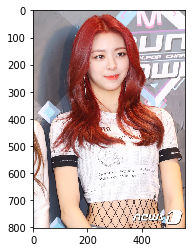

In [10]:
s=float(os.path.getsize(path))/1000
plt.imshow(img)

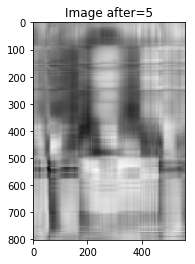

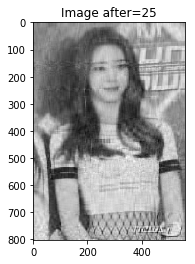

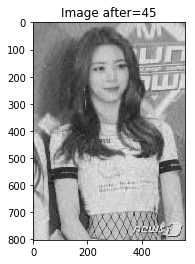

In [22]:
imggray=img.convert('LA')
imgmat=np.array(list(imggray.getdata(band=0)),float)
imgmat.shape=(imggray.size[1],imggray.size[0])
imgmat=np.matrix(imgmat)
plt.figure()
plt.imshow(imgmat,cmap='gray')
U,s,VT=np.linalg.svd(imgmat)
for i in range(5,51,20): #특이값 5개(대각성분 5*5) 20개(대각성분 20*20) 45개 선택했을때
    cmping=np.matrix(U[:,:i])*np.diag(s[:i])*np.matrix(VT[:i,:])
    plt.imshow(cmping,cmap='gray')
    plt.title('Image after=%s'%i)
    plt.show()
    result=Image.fromarray((cmping).astype(np.uint8))